<a href="https://colab.research.google.com/github/Nikhil-Rao-789/Ai-for-heath/blob/main/Scripts/vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from google.colab import drive
drive.mount('/content/drive')

PROJECT_ROOT = "/content/drive/MyDrive/AI for Health"
DATA_DIR = f"{PROJECT_ROOT}/Data"
VIS_DIR = f"{PROJECT_ROOT}/Visualizations"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv(f'{DATA_DIR}/AP01/SPO2 - 30-05-2024.txt', sep=';',skiprows=7,names=["Time","Value"])

In [28]:
df["Time"] = pd.to_datetime(df["Time"],format="%d.%m.%Y %H:%M:%S,%f")

In [29]:
df.set_index("Time",inplace = True)

In [32]:
df = df.sort_index()

In [44]:
min = 80
max = 100
df["Value"] = df["Value"].where((df["Value"] >= min) & (df["Value"] <= max), np.nan).interpolate(method="linear")

In [56]:
start_time = df.index[0]
end_time = start_time + pd.Timedelta(minutes=5)

df_5min = df.loc[start_time:end_time]

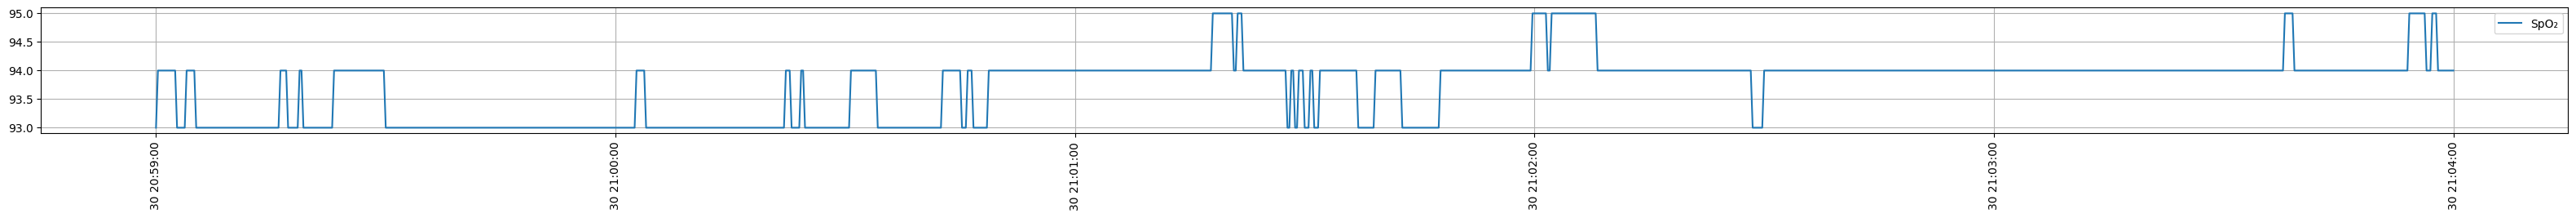

In [59]:
fig, ax = plt.subplots(figsize=(40,2))

ax.plot(df_5min.index, df_5min["Value"], label="SpO₂")

ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %H:%M:%S"))

plt.setp(ax.get_xticklabels(), rotation=90)
plt.legend()
plt.grid()
plt.show()

In [33]:
df.head(5)

,Value
Time,
2024-05-30 20:59:00.000,93
2024-05-30 20:59:00.250,94
2024-05-30 20:59:00.500,94
2024-05-30 20:59:00.750,94
2024-05-30 20:59:01.000,94
